In [57]:

import scanpy as sc
import numpy as np
import pandas as pd
import anndata2ri
import matplotlib.pyplot as pl
from matplotlib import rcParams

# Activate the anndata2ri conversion between SingleCellExperiment and AnnData
anndata2ri.activate()

#Loading the rpy2 extension enables cell magic to be used
#This runs R code in jupyter notebook cells
%load_ext rpy2.ipython

sc.settings.verbosity = 3
sc.logging.print_versions()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 8.3.1
anndata2ri          1.0.6
anyio               NA
appnope             0.1.2
attr                21.2.0
babel               2.9.1
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
certifi             2021.05.30
cffi                1.14.6
chardet             4.0.0
cloudpickle         1.6.0
colorama          

In [58]:
%%R

library(Seurat)

Batch12MTG=readRDS("~/Documents/Projects/PD5D_Repository/scRNA_and_scATAC-seq_Markdowns/batch12_ASAP_snRNA-seq_063021/scRNA-seq/Files/Batch12_MTG_Unassigned.rds")


In [60]:
%%R -o Batch12MTG_sce

#convert the Seurat object to a SingleCellExperiment object
Batch12MTG_sce <- as.SingleCellExperiment(Batch12MTG)


In [62]:
Batch12MTG[["percent.mt"]] <- PercentageFeatureSet(Batch12MTG, pattern = "^MT-")

VlnPlot(Batch12MTG, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

NameError: name 'Batch12MTG' is not defined

In [61]:
Batch12MTG[["percent.mt"]] <- PercentageFeatureSet(Batch12MTG, pattern = "^MT-")

VlnPlot(Batch12MTG, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

Batch12MTG_sce.var['mt'] = Batch12MTG_sce.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
Batch12MTG_sce.var['mt']
sc.pp.calculate_qc_metrics(Batch12MTG_sce, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.highest_expr_genes(Batch12MTG_sce, n_top=20, )

NameError: name 'Batch12MTG' is not defined

In [51]:
sc.pp.calculate_qc_metrics(Batch12MTG_sce, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

normalizing counts per cell
    finished (0:00:00)


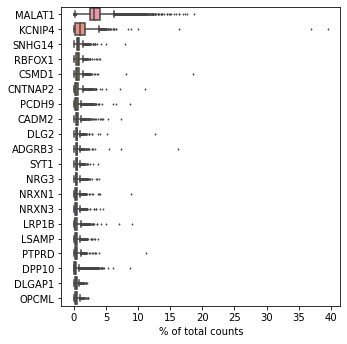

In [52]:
sc.pl.highest_expr_genes(Batch12MTG_sce, n_top=20, )

... storing 'sample_ID' as categorical
... storing 'case' as categorical


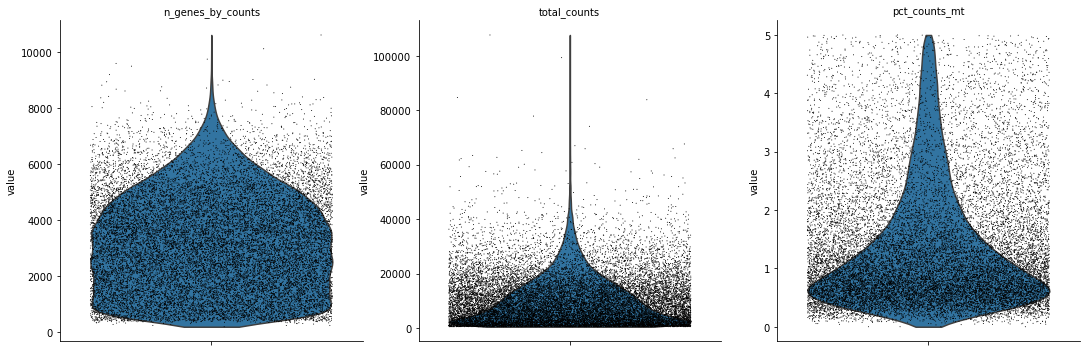

In [53]:

sc.pl.violin(Batch12MTG_sce, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)



In [54]:
sc.pp.neighbors(Batch12MTG_sce, n_neighbors=15, n_pcs=20)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:25)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)


In [55]:
sc.tl.draw_graph(Batch12MTG_sce, color='seurat_clusters', legend_loc='on data')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:36)


In [43]:
sc.tl.paga(Batch12MTG_sce, groups='seurat_clusters')

ValueError: You need to run `pp.neighbors` first to compute a neighborhood graph.

--> added 'pos', the PAGA positions (adata.uns['paga'])


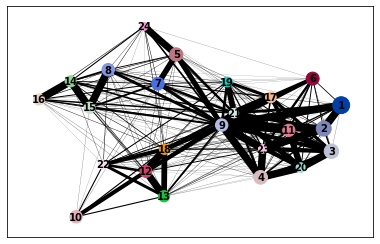

In [9]:
sc.pl.paga(Batch12MTG_sce)

--> added 'pos', the PAGA positions (adata.uns['paga'])


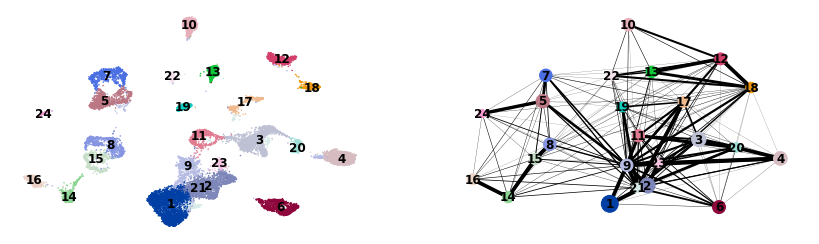

In [14]:
sc.pl.paga_compare(
    Batch12MTG_sce, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, save=True)

In [23]:
sc.pl.draw_graph(Batch12MTG_sce, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data')

KeyError: 'draw_graph'